## Plotly와 Matplotlib, Seaborn을 이용한 노벨상 분석

- 이번 시간에는 과거 노벨상 수상자들에 대한 데이터셋을 분석할 예정이다. 대략적 분석할 내용은 아래와 같다. 
    - 과거 수상자들에 대해 어떤 패턴을 발견할 수 있는지?
    - 노벨상과 우리의 세계에 대해 더 일반적인 뭔가를 배울 수 있는지?

<img src="asset/nobel_prize.png">

- 1895년 11월 27일, 알프레도 노벨은 그의 마지막 유언장에 서명했다. 노벨 사후 유언장이 공개되었을 때, 그의 부를 노벨상 제정을 위해 남겨두기로 해서 많은 논란이 있었다(왜냐하면 노벨은 다이너마이트를 개발한 죽음의 상인이라고 불렸기 때문). 
- 유언장 내용은 '나의 전 재산을 전 인류에게 가장 큰 공헌을 한 사람에게 사용하라' 였다.
- 현재 매년 노벨상은 화학, 문학, 물리학, 생리학, 의학, 경제, 평화 분야의 과학자와 수학자들이게 수여된다.

### 이번 시간에 다룰 내용 
- 단계구분도를 만들어 지도에 데이터 표시 
- 데이터의 여러 부분들을 plotly를 통해 보여주는 막대 차트를 만들기
- plotly를 통해 선버스트 차트를 만들기
- Seaborn의 . lmplot()을 사용하고, row나 hue, lowess 매개변수를 사용하여 여러 범주에 걸친 최적의 선을 표시하기
- 같은 데이터를 다른 방식으로 볼 때 어떻게 다른 그림이 나타나는지 이해하기(상자 그림과 시계열 분석)
- Seaborn의 히스토그램을 이용하여, 데이터 분포를 확인하고 기술 통계를 시각화하기

### 1. 데이터 탐색 및 전처리 

In [1]:
# 필요 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1-1. 데이터 탐색

In [2]:
# 데이터 불러오기 
data = pd.read_csv('data/nobel_prize_data.csv')
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [3]:
# 데이터 수 및 컬럼명 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [4]:
# 노벨상이 처움 수여된 해 확인
print(f'First Nobel Pirze year: {data.year.min()}')
print(f'Most recents Nobel Prize year on this dataset:{data.year.max()}')

First Nobel Pirze year: 1901
Most recents Nobel Prize year on this dataset:2020


- 데이터의 수는 962개의 행과 16개의 열이 있다. 
- 노벨상이 처음 수여된 해는 1901년 이고, 데이터셋 기준 최근 수여된 해는 2020년이다.
- 해당 데이터셋의 컬럼 정보는 아래와 같다. 
    - year: 노벨상 수여 년도 
    - category: 노벨상 분야
    - prize: 노벨상 명칭 
    - motivation: 연구에 대한 동기부여 
    - prize_share: 노벨상 분배(공동 수상 여부 확인)
    - laureate_type: 수상 타입(Individual: 개인, Organization: 조직)
    - full_name: 수상자 이름
    - birth_date: 수상자 생년월일
    - birth_city: 수상자 출생 도시
    - birth_country: 수상자 출생 국가 (현재 존재하지 않는 국가일 경우 해당 열에 기입한 데이터)
    - birth_country_current: 수상자 출생 국가의 현재 이름
    - sex: 수상자 성별
    - organization_name: 수상자가 소속된 연구 기관 이름
    - organization_city: 수상자가 소속된 연구 기관이 있는 도시 
    - organization_country: 수상자가 소속된 연구 기관이 있는 국가
    - ISO: 국가 코드(ISO 표준 코드)

#### 1-2. 중복값 및 결측값 확인

In [5]:
# 중복 데이터 개수 확인 
print(f'Any duplicates? {data.duplicated().sum()}')
# 또는 - data.duplicated().values.any()

Any duplicates? 0


In [6]:
# NaN 값 확인
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

- 데이터셋에 중복값은 존재하지 않고, NaN 값은 존재한다. 
- NaN 값이 존재하는 열 및 개수는 아래와 같다
    - motivation - 88건
    - birth_date - 28건
    - birth_city - 31건
    - birth_country - 28건
    - birth_country_current - 28건
    - sex - 28건
    - organization_name - 255건 
    - organization_city - 255건
    - organization_country - 255건
    - ISO - 28건

In [7]:
# NaN 값들만 있는 데이터 필터링 - 생년월일 열 기준으로 필터링 
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
data.loc[data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [8]:
# NaN 값들만 있는 데이터 필터링 - 조직기관 열 기준으로 필터링 
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
data.loc[data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


- 생년월일에 NaN 값이 왜 많은 것일까? 그리고 조직 열에 값이 없는 경우는 무엇일까? 
- 위와 같이 생년월일 열의 NaN 값을 필터링 해보면 UN이나 적십자와 같은 여러 기관임을 알 수 있다. 그리고 해당 조직들의 명칭은 full_name 열에 있으므로 organization_name 열에는 NaN이 포함된다.
- 추가적으로, organization_name열에 값이 없는 행을 살펴보면, 노벨상은 대락이나 연구소에 소속되지 않은 사람에게도 수여되는 것을 확인할 수 있는데, 문학상 이나 평화상이 여기에 포함된다.

#### 1-3. 데이터 타입 변경 및 공동 수상 비율 컬럼 추가

In [9]:
# 수상자 출생년도 datetiem으로 데이터 타입 변경 
data['birth_date'] = pd.to_datetime(data['birth_date'])
type(data['birth_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# 공동 수상자 비율 계산 후 컬럼 추가 
separated_values = data.prize_share.str.split('/', expand=True)  # '/' 기준으로 문자열 분리 
numerator = pd.to_numeric(separated_values[0])                   # 분자 - 분리한 첫 번째 문자열을 숫자(int)로 변환 
denomenator = pd.to_numeric(separated_values[1])                 # 분모 - 분리한 두 번째 문자열을 숫자(int)로 변환 
data['share_pct'] = numerator / denomenator                      # 비율 계산 후 추가한 'share_pct'컬럼에 저장
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.000000
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.000000
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.000000
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.500000
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.333333
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.250000
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.250000


### 2. Plotly 막대 및 도넛 차트: 시상 부문 및 여성 수상자 분석하기
- 데이터 사이언스의 큰 부분 중 하나는 우리가 탐구하고자 하는 것이 무엇인지 생각해보는 것이다.
    1. 노벨 수상자 중 여성 비율은 어느 정도 될까? 
    2. 최소 여성 노벨 수상자는 누구며, 어떤 사람들일까?
    3. 노벨상을 2번 이상 받은 사람은 누구일까?
    4. 노벨상의 수상 부문은 무엇이 있을까? 
    5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까? 

#### 2-1. 노벨 수상자 중 여성 비율은 어느정도 될까? 

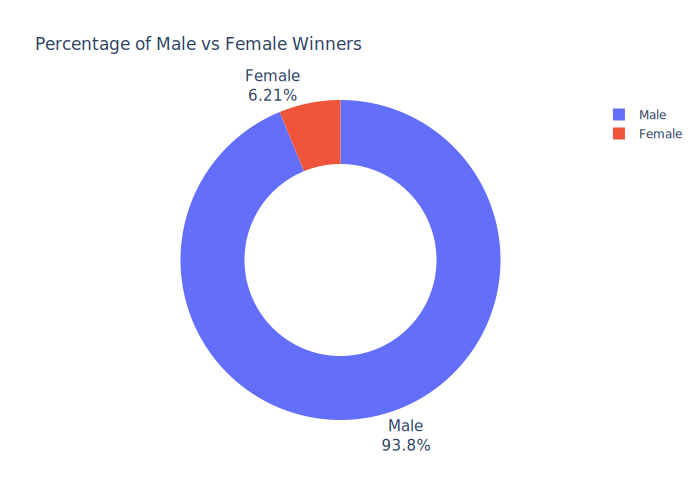

In [41]:
# 노벨 수상자 상별 비율 도넛차트 그리기 
sex_rating = data.sex.value_counts()

# 도넛차트 만들기 
fig = px.pie(labels=sex_rating.index, 
             values=sex_rating.values, 
             title="Percentage of Male vs Female Winners", 
             names=sex_rating.index, 
             hole=0.6)                                                  # 제목, 범주 명칭 설정 + 파이차트를 위한 hole 인자 추가

fig.update_traces(textposition='outside', 
                  textfont_size=15, textinfo='percent+label')           # 파이차트 내 text 설정 - 레이블 위치와 표기 설정 등

fig.show(renderer='svg') 

#### 2-2. 최소 여성 노벨 수상자는 누구며, 어떤 사람들일까?

In [12]:
# 첫 여성 노벨상 수상자 3명의 데이터 필터링
data[data['sex'] == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


- 노벨상 수상자 성별 비율을 조사한 결과 여성의 비율은 6.21%로 나타났다. 
- 첫 여성 노벨상 수상자 3명(혹은 3개의 조직)은 아래와 같다
    1. Marie Curie, née Sklodowska
    2. Baroness Bertha Sophie Felicita von Suttner
    3. Selma Ottilia Lovisa Lagerlöf
- 여기서 최초 여성 수상자는 "마리 퀴리"이다. 물리학 상을 받았는데, 개인이 받았지만 공동 수상인 4명 중 1명으라고 표시되어 있다. 
- 3명의 수상자 각각 러시아 제국(폴란드), 오스트리아 제국(체코 공화국), 스웨덴 출신이다.

#### 2-3. 노벨상을 두 번 이상 받은 사람은 누구인가?

In [46]:
# 노벨상을 두 번 이상 받은 사람 추출
is_winner = data.duplicated(subset=['full_name'], keep=False)
multiple_winners = data[is_winner]
print(f'There are "{multiple_winners.full_name.nunique()}' \
      ' winners" who were awarded the prize more than once.')

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are "6 winners" who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


- 노벨상을 두 번 이상 받은 사람(혹은 단체)는 총 6명이다. 
- 이들 중 개인 자격으로 두 번 이상 받은 사람은 4명이다.

#### 2-4. 노벨상은 몇 개의 부문이 있으며, 가장 많이 수여된 부문과 적게 수여된 부문은 무엇일까?

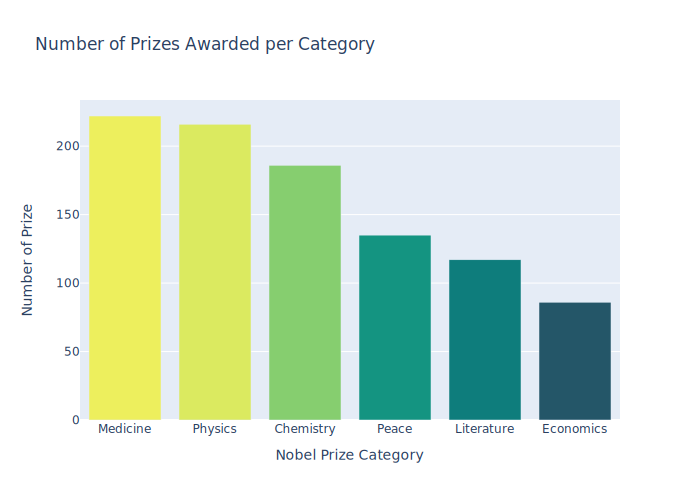

In [47]:
# 노벨상 부문 추출
nobel_category = data['category'].value_counts()

bar = px.bar(x=nobel_category.index, 
             y=nobel_category.values,
             color = nobel_category.values,
             color_continuous_scale='Aggrnyl',
             title='Number of Prizes Awarded per Category')

bar.update_layout(xaxis_title="Nobel Prize Category", 
                  coloraxis_showscale=False,
                  yaxis_title='Number of Prize')

bar.show(renderer='svg')

- 노벨상은 6개 부문으로 구성되어 있다. 가장 많이 수여된 부문은 의학상 이고, 가장 적게 수여된 부문은 경제학상 이다.

In [36]:
cat_men_women = data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


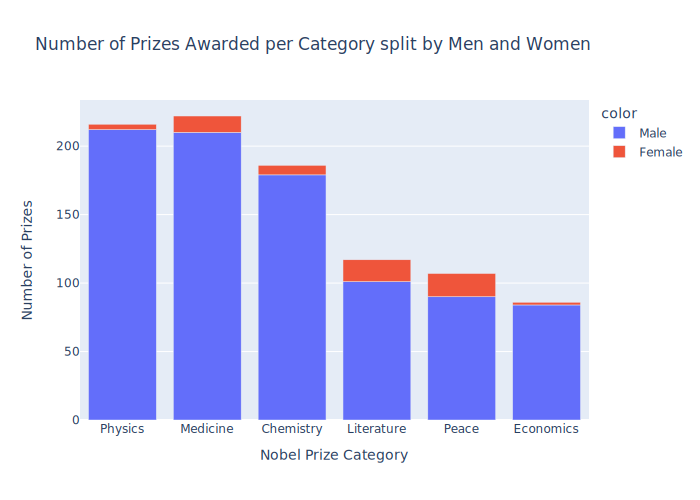

In [40]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')

v_bar_split.show(renderer='svg')

- 그럼 노벨상을 수상한 부문을 성별로 구분해보았다. 전반적으로 물리학, 경제학, 화학의 성비 불균형이 크다는 것을 알 수 있다. 
- 여성들은 주로 의학, 문학, 평화 부분의 수상이 상대적으로 많았다. 

#### 2-5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까?

In [26]:
data[data['category'] == 'Economics']

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.500000
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.500000
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.000000
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.000000
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.333333
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.333333
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.333333
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.500000


- 노벨 경제학상이 처음으로 수여된 때는 1969년 이고, 최초 수상자는 공동 수상으로 "얀 틴베르헌"과 "랑나르 안톤 시틸 프리슈" 이다.

- 질문에 대한 답변을 정리하고자 한다. 
    1. 노벨 수상자 중 여성 비율은 어느정도 될까?
        - 1901년 이후 역대 노벨상 수상자 중 여성은 6.2%에 불과하다. 
    2. 최초 여성 노벨상 수상자 3인은 누구인가?
        - Marie Curie, née Sklodowska (러시아 제국(폴란드))
        - Baroness Bertha Sophie Felicita von Suttner (오스트리아 제국(체코 공화국))
        - Selma Ottilia Lovisa Lagerlöf (스웨덴)
    3. 노벨상 다회 수상자는 누구인가? 
        - 노벨상을 두 번 이상 받은 사람(혹은 단체)는 총 6명이며, 이들 중 개인 자격으로 두 번 이상 받은 사람은 4명이다.
        - 그 중 "마리 퀴리"는 물리학에서 한 번, 화학에서 한 번 수상, " 라이너스 칼 폴링"은 화학상 수상, 핵 군축에 대한 업적으로 평화상을 수상, "국제 적십자사"는 3번의 평화상을 수상했으며, 앞선 2회는 모두 세계 대전중 수상 하였다.
    4. 노벨상은 몇 개의 부문이 있으며, 가장 많이 수여된 부문과 적게 수여된 부문은 무엇일까?
        - 노벨상은 6개 부문으로 구성되어 있다. 가장 많이 수여된 부문은 "의학상" 이고, 가장 적게 수여된 부문은 "경제학상" 이다.
        - 추가적으로 노벨상을 수상한 부문을 성별로 구분해본 결과, 전반적으로 물리학, 경제학, 화학의 성비 불균형이 크다는 것을 알 수 있으며, 여성들은 주로 의학, 문학, 평화 부분의 수상이 상대적으로 많았다.
    5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까?
        - 노벨 경제학상이 처음으로 수여된 때는 1969년 이고, 최초 수상자는 공동 수상으로 "얀 틴베르헌"과 "랑나르 안톤 시틸 프리슈" 이다.
        - 여기서 경제학상 수상자가 왜 적은지 알 수 있다. 1901년 부터 수상된 물리학상에 비해, 경제학상은 1969년에 처음 수여 되었기 때문이다.